In [20]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [22]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpre2d4pfvGP2
Verbose mode active!


In [23]:
# load our larger toy dataset
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/test_dataset/data/data_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/test_dataset/data/img_ground_truths.npy')

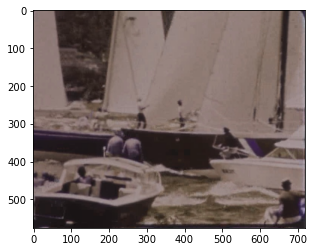

In [24]:
plt.imshow(images[0])

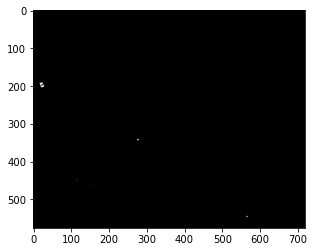

In [25]:
plt.imshow(masks[0])

In [26]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [27]:
R.setup_data(images, masks, dataset_size=568, weights=weights)

Weights OK!


In [28]:
RUNS = 2

In [29]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100


ValueError: in user code:

    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/vivek.kamisetty001/anaconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:267 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 512, 512, 1), found shape=(None, 576, 720)


568

568